In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire as aq
import prepare as p


# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Exercise Instructions

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## Acquire and Prep Data OPSD Data

In [2]:
#acquire
energy = aq.get_power_data()

Using cached csv...


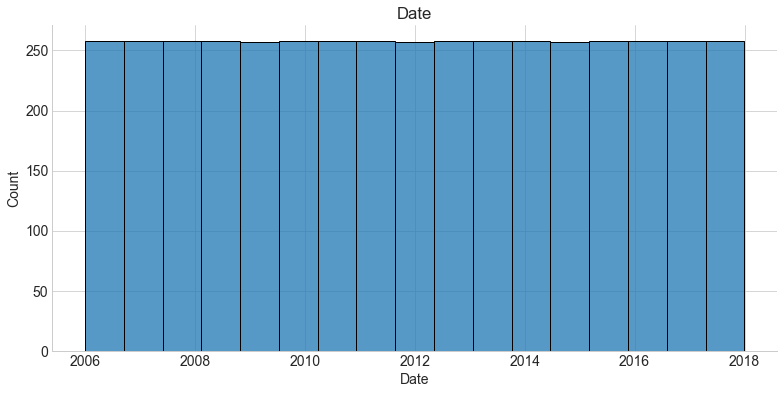

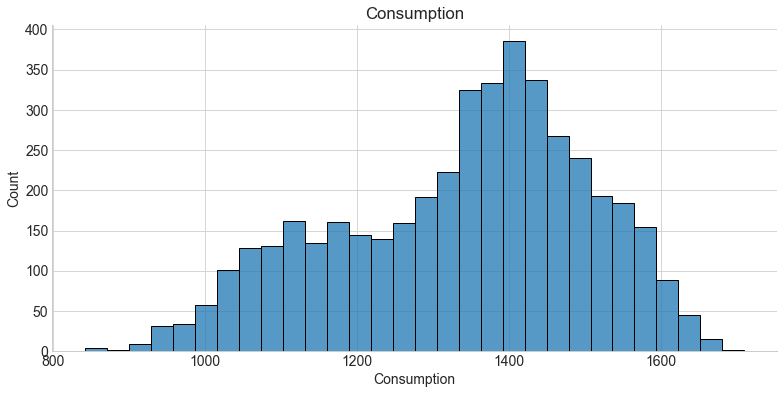

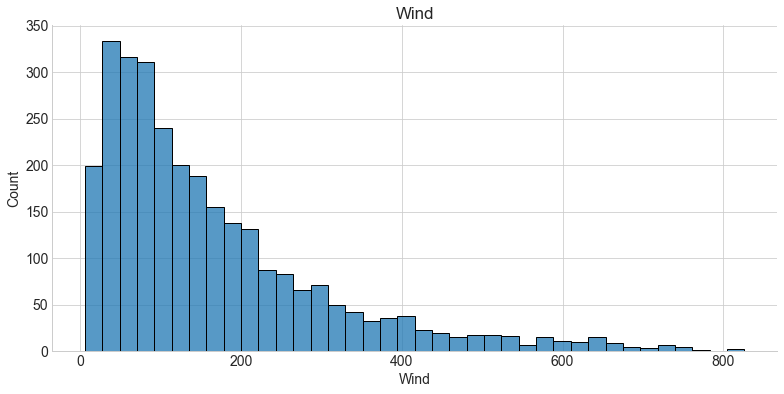

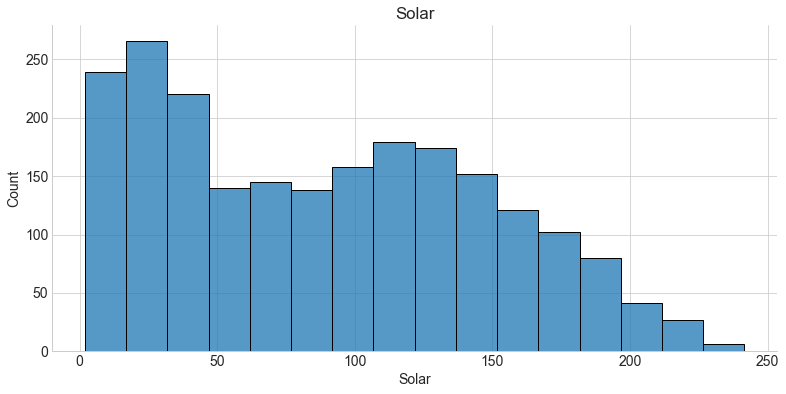

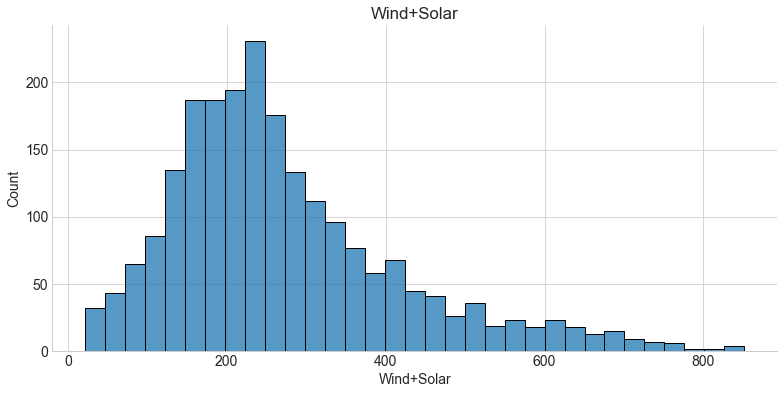

In [3]:
#prepare
energy = p.prepare_energy(energy)

In [4]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


<AxesSubplot:xlabel='Date'>

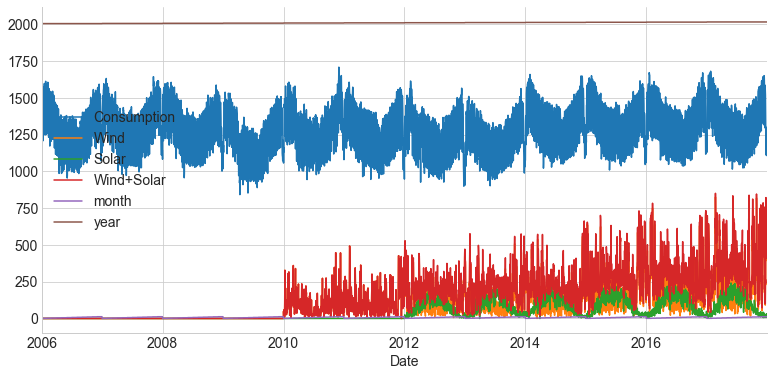

In [6]:
energy.plot()

In [7]:
energy.index.min()

Timestamp('2006-01-01 00:00:00')

In [8]:
energy.index.max()

Timestamp('2017-12-31 00:00:00')

## Split Data

*I'll implement the human-based approach for splitting this data. The train set will conisist of everthing up to 2016. Test will conist of data from 2016 - 2017.*

In [9]:
train = energy[:'2015']
test = energy['2016':]
train.shape, test.shape

((3652, 6), (731, 6))

## Explore Data

<AxesSubplot:xlabel='Date'>

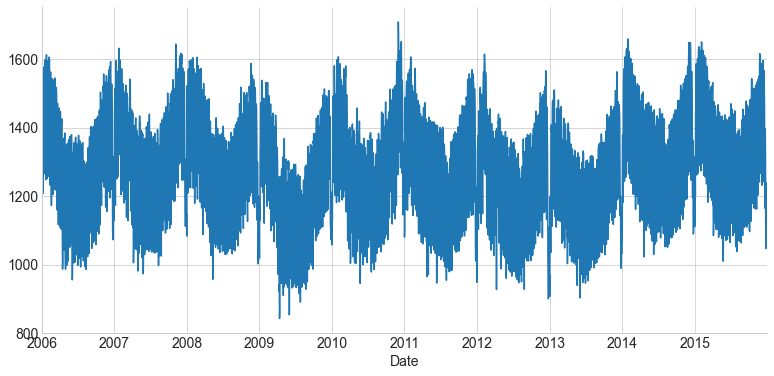

In [10]:
# Let's plot consumption
train.Consumption.plot()

<AxesSubplot:xlabel='Date'>

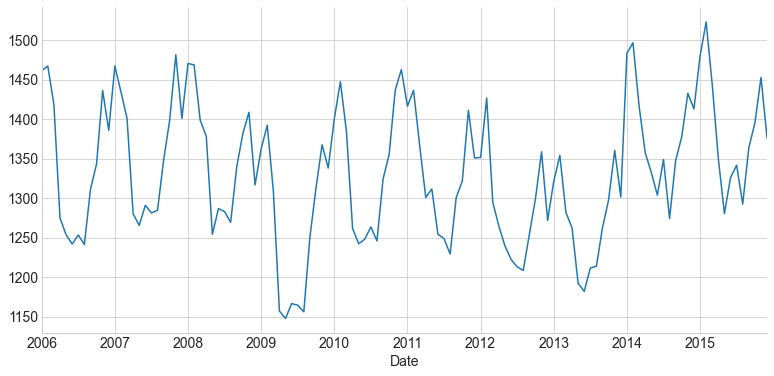

In [11]:
# Let's resample and look at monthly averages
train.resample('M').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

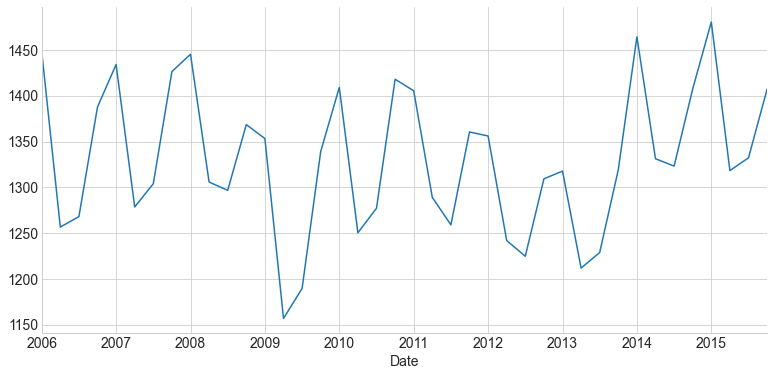

In [12]:
# How about quarterly
train.resample("Q").Consumption.mean().plot()


*There's a clear cycle. It seems like it represents greater consumption in colder months vs less int he summer months.*

In [13]:
y = train.Consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,89.281365,NaN
2006-02-28,1467.106893,NaN,113.896299,NaN
2006-03-31,1418.649161,NaN,37.569597,NaN
2006-04-30,1275.058900,NaN,-38.915070,NaN
2006-05-31,1253.488484,NaN,-77.751511,NaN


<AxesSubplot:xlabel='Date'>

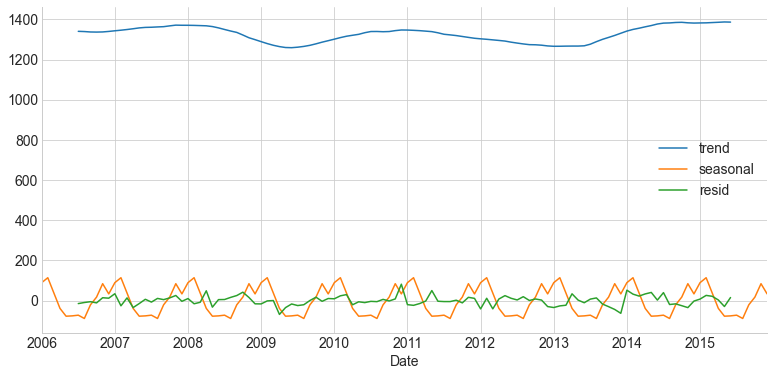

In [14]:
decomposition.iloc[:, 1:].plot()

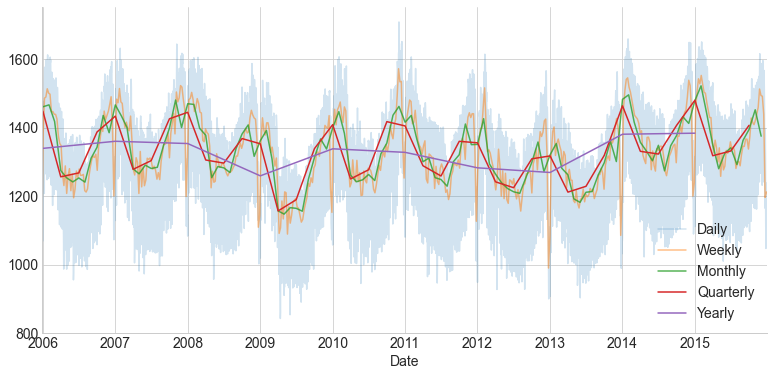

In [15]:
# Let's re-sample on different time scales to look for a trend
train.Consumption.plot(label = 'Daily', alpha = 0.2)
train.Consumption.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Consumption.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Consumption.resample('Q').mean().plot(label = 'Quarterly')
train.Consumption.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*There seems to be a conistent trend overtime.*

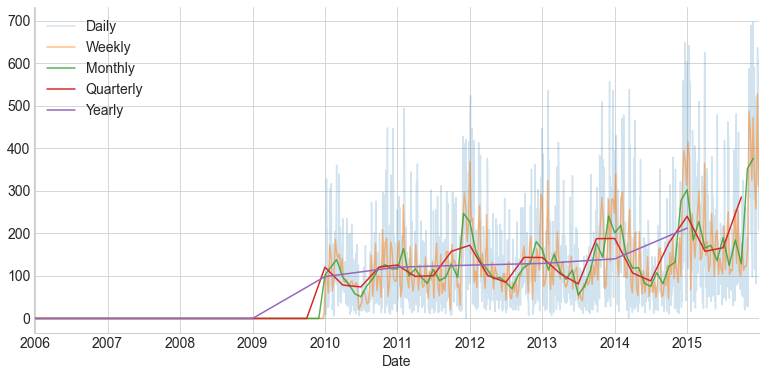

In [16]:
# Let's look at wind power generation
train.Wind.plot(label = 'Daily', alpha = 0.2)
train.Wind.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Wind.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Wind.resample('Q').mean().plot(label = 'Quarterly')
train.Wind.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*There's a clear positive trend here steadily increasing over the years. It also seems like theres a clear cycle that varies depending on the windier to less windy months of the year.*

<AxesSubplot:xlabel='Date'>

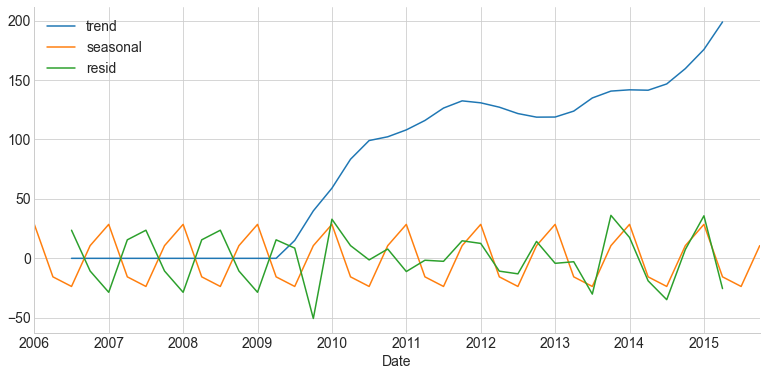

In [17]:
y = train.Wind.resample('Q').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

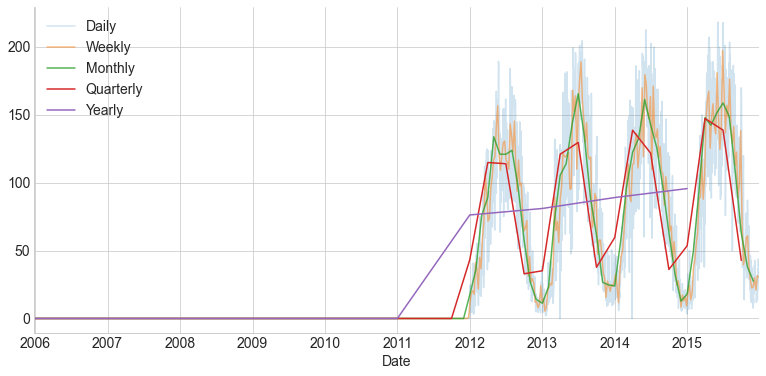

In [18]:
# Let's look at solar power generation now
train.Solar.plot(label = 'Daily', alpha = 0.2)
train.Solar.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Solar.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Solar.resample('Q').mean().plot(label = 'Quarterly')
train.Solar.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*There's an overall upward trend and a much clearer seasonal cycle for solar power generation. Very high generation in the summer that steeply dropps off in winter.*

<AxesSubplot:xlabel='Date'>

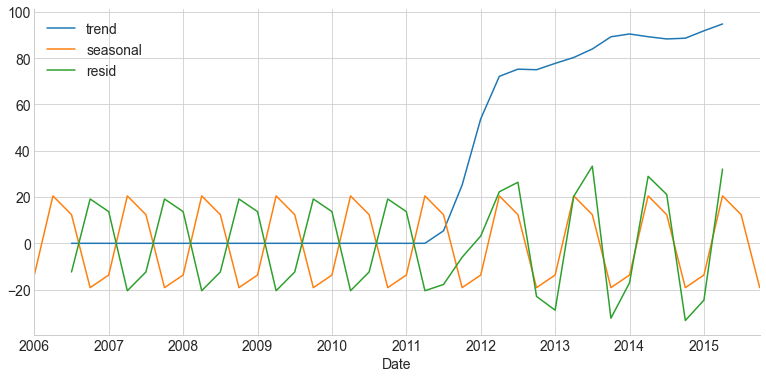

In [19]:
y = train.Solar.resample('Q').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

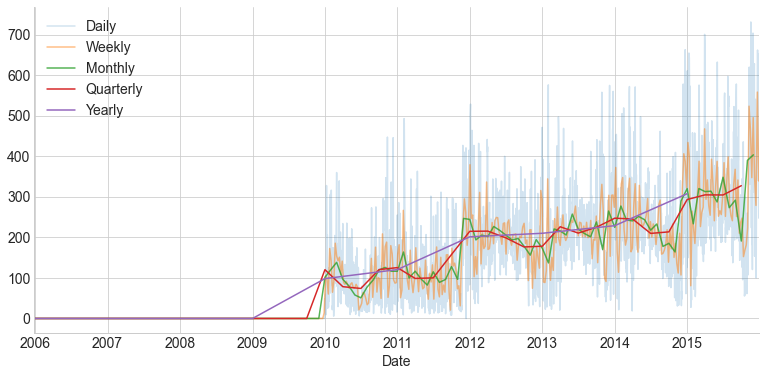

In [20]:
# Let's look at the solar and power combined column 
#Now check wind and solar power production combined
#Check Solar Power generation
#Move on to wind power generation
train['Wind+Solar'].plot(label = 'Daily', alpha = 0.2)
train['Wind+Solar'].resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train['Wind+Solar'].resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train['Wind+Solar'].resample('Q').mean().plot(label = 'Quarterly')
train['Wind+Solar'].resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*Again, an overall upward trend with seasonal cycles that are a bit less distinct when viewed together.*

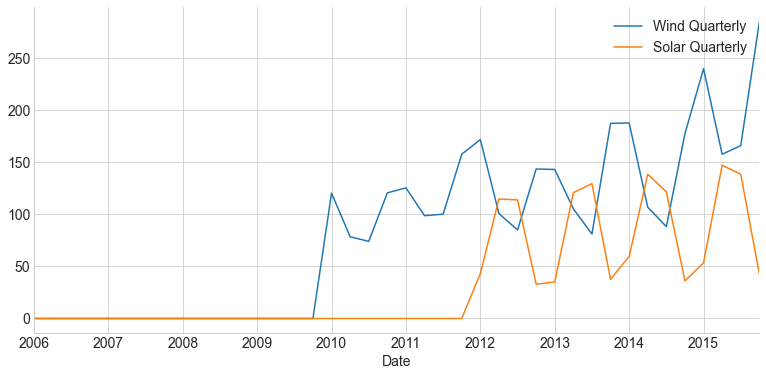

In [21]:
# Let's look at wind and solar side by sis, resampled quarterly
train.Wind.resample('Q').mean().plot(label = 'Wind Quarterly')
train.Solar.resample('Q').mean().plot(label = 'Solar Quarterly')
plt.legend()
plt.show()

*This shows how the solar generation is making up for drops in wind generation in summer months.*

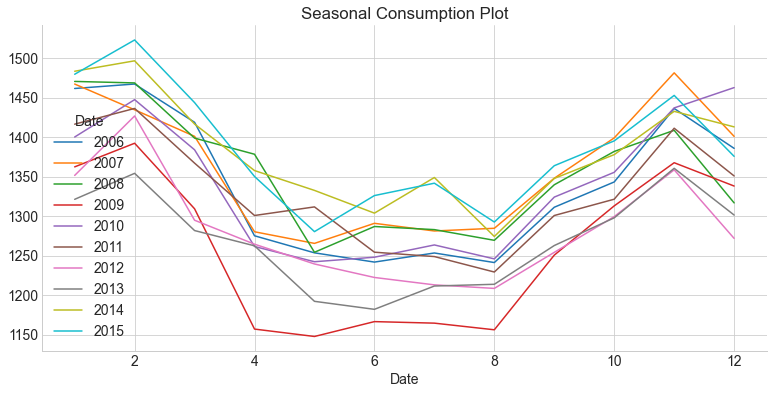

In [22]:
#Let's compare the yearly plots of each group
y = train.Consumption
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Consumption Plot')
None

## Acquire and Prepare Store Item Data

In [23]:
df = aq.get_merged_data()
df.head()

Using cached csv...


,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [24]:
#Convert the Date column to a datetime format
df.sale_date = pd.to_datetime(df.sale_date)

In [25]:
#Add a month and a year column to dataframe
df['month'] = df.sale_date.dt.month
df['year'] = df.sale_date.dt.year

In [26]:
#set datatime as index
df = df.set_index('sale_date').sort_index()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  year           913000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 111.5+ MB


In [28]:
#Test function in prepare file
#acquire
df = aq.get_merged_data()

Using cached csv...


In [29]:
#prepare 
df = p.prepare_merged_data(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   store_address  913000 non-null  object 
 5   store_city     913000 non-null  object 
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  year           913000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 111.5+ MB


In [31]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,year
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,2013
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013


## Split the Data

*I'll implement a percentage based split for splitting this data. The train set will conisist of the first 70%. Test will conist of last 30%.*

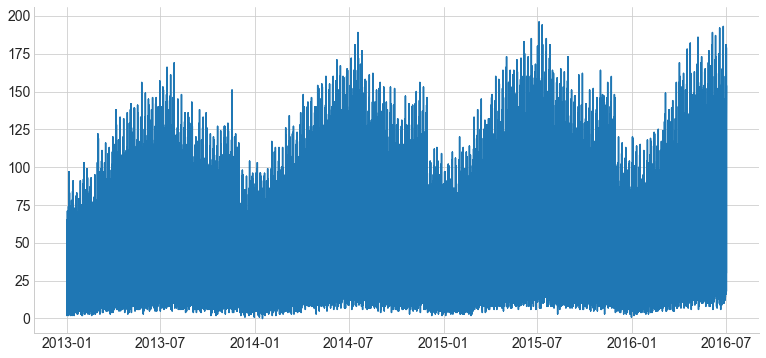

In [33]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up to (not including) the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)

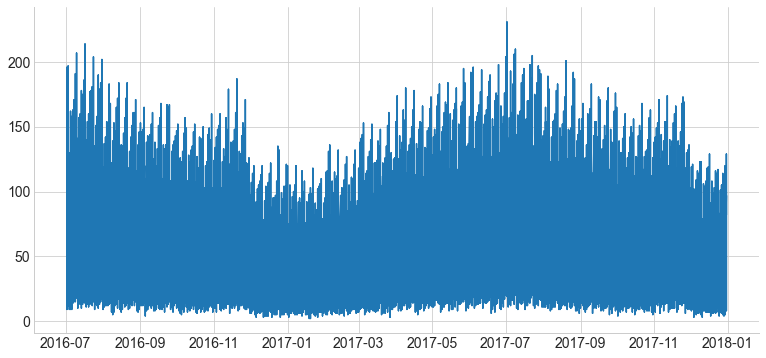

In [34]:
plt.plot(test.index, test.sale_amount)

## Explore the Data

In [36]:
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

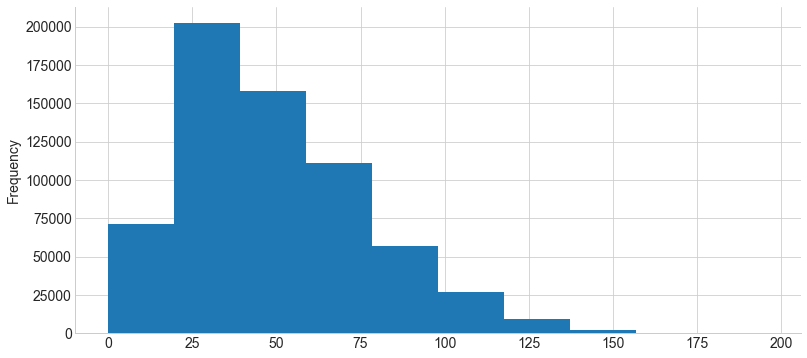

In [37]:
y.plot.hist()

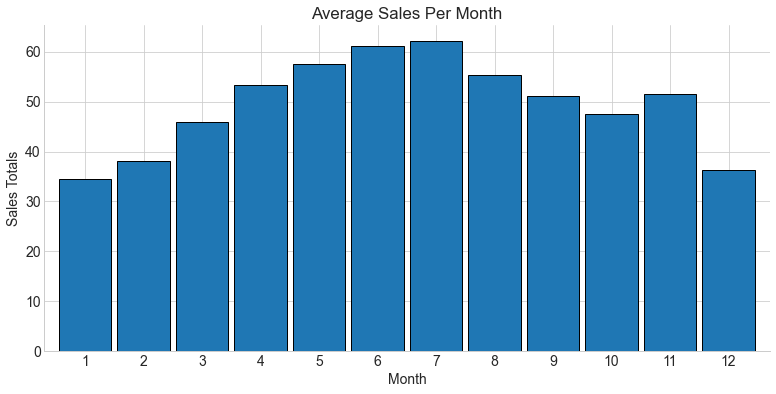

In [41]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Per Month', xlabel='Month', ylabel='Sales Totals')
None

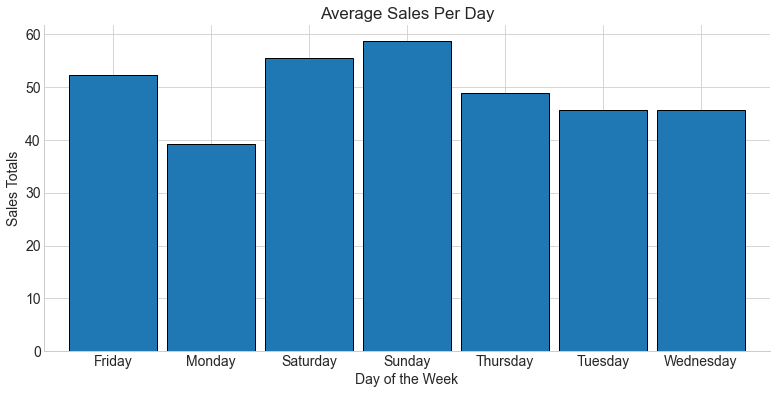

In [40]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Per Day', xlabel='Day of the Week', ylabel='Sales Totals')
None

*The majority of our sales are on the weekends Friday - Sunday which makes sense for a grocery store.*

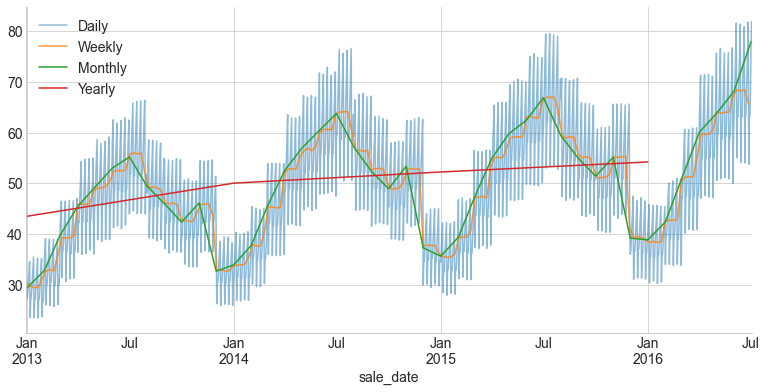

In [44]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
None

*A continuous upward trend with a cycle that shows increased sales in the summer months is clearly visible.*

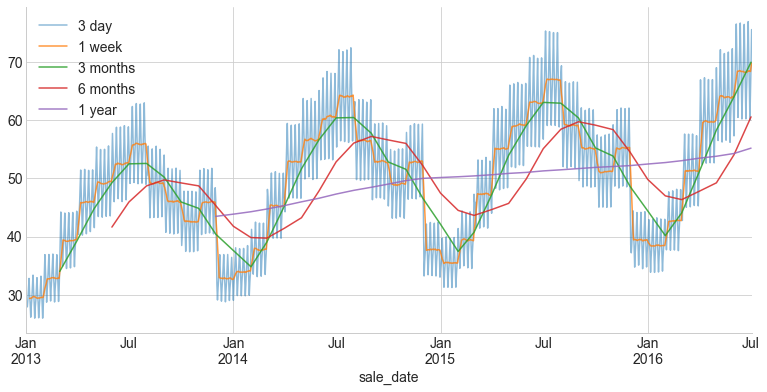

In [45]:
# Let's try using the rolling method
# the rolling method 
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().rolling(3).mean().plot(alpha=.85, label='3 months')
y.resample('M').mean().rolling(6).mean().plot(alpha=.85, label='6 months')
y.resample('M').mean().rolling(12).mean().plot(alpha=.85, label='1 year')
plt.legend()


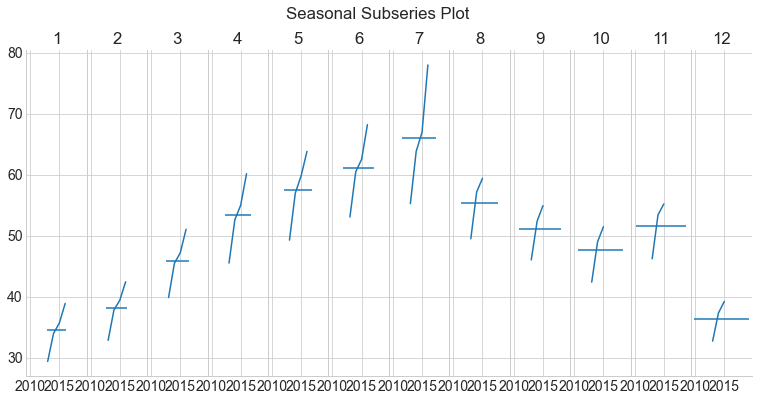

In [46]:
# Let's look at seasonal subseries
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') 
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

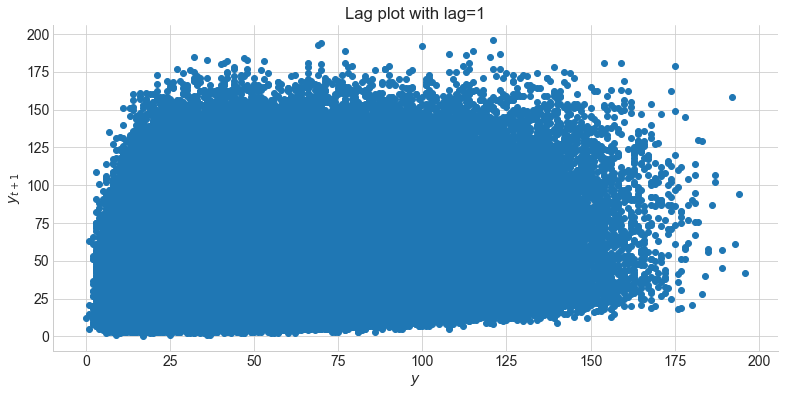

In [48]:
# Let's try a lagplot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

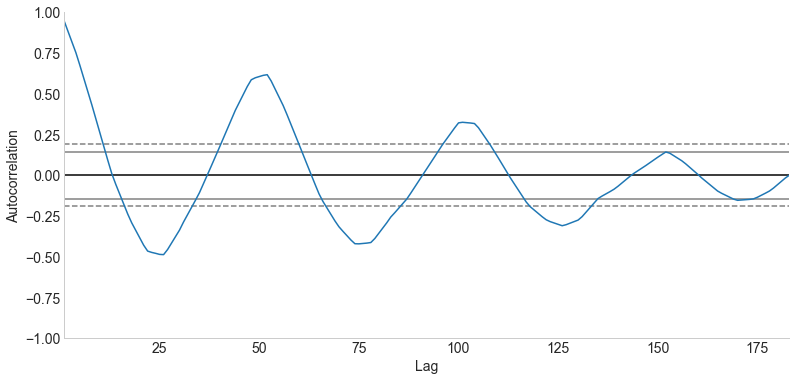

In [51]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

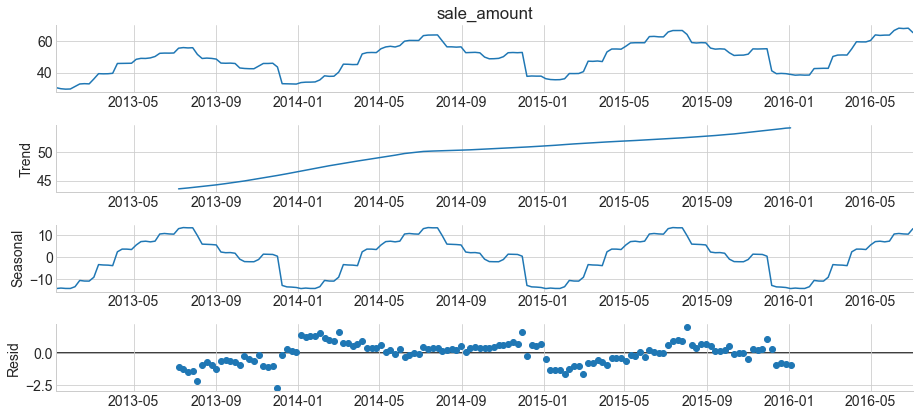

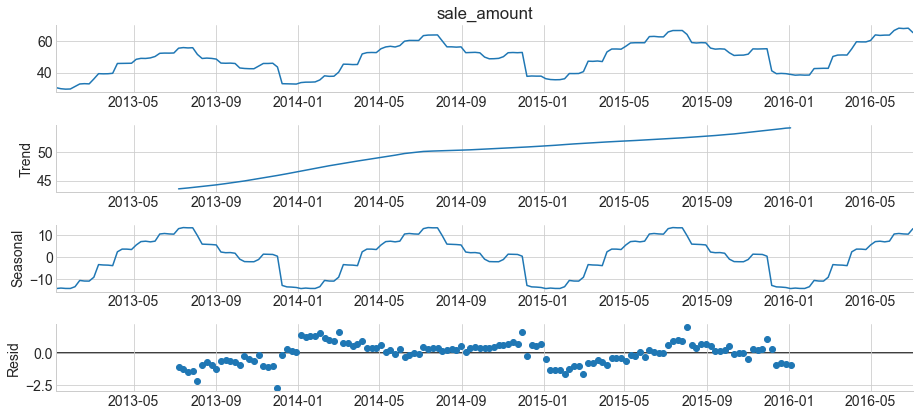

In [52]:
## Let's try a seasonal decompose 
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

result.plot()